# Video Game Sales Visualisation

## Informasi Kelompok
1. Fakhri Alauddin ( 1203220131 )
2. M Riyan Akbari ( 1203220130 )
3. Elan Agum Wicaksono ( 1203220005 )
4. Ferry Oktariansyah ( 1203220006 )



### About Dataset
This dataset contains video game sales data across different platforms, genres, and regions, making it valuable for various analytical and business use cases.

- Total Records = 16,598
- Total Collumn = 11

- Rank (int): Rank of the game in terms of sales.
- Name (str): Name of the video game.
- Platform (str): Gaming platform (e.g., Wii, NES, GB).
- Year (float): Release year (some missing values).
- Genre (str): Game genre (e.g., Sports, Racing, Role-Playing).
- Publisher (str): Publisher of the game (some missing values).
- NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales (float): Sales in different regions (millions of copies).

Kemungkinan Visualisasi Data

1. Visualisasi Distribusi
- Histogram Tahun Rilis: Distribusi tahun rilis game untuk melihat tren produksi game
- Pie Chart Genre: Persentase game berdasarkan genre
- Pie Chart Platform: Distribusi game berdasarkan platform

2. Visualisasi Tren
- Line Chart Penjualan Global per Tahun: Tren penjualan global dari tahun ke tahun
- Line Chart Penjualan per Region per Tahun: Perbandingan tren penjualan di NA, EU, JP, dan Other

- Tren Genre Populer: Perkembangan genre populer dari waktu ke waktu

3. Visualisasi Perbandingan
- Bar Chart Publisher Teratas: 10 publisher dengan penjualan global tertinggi
- Bar Chart Game Terlaris: 20 game dengan penjualan global tertinggi
- Bar Chart Platform Terlaris: Perbandingan penjualan antar platform

4. Visualisasi Korelasi
- Scatter Plot Penjualan vs Tahun: korelasi antara tahun rilis dan penjualan
- Scatter Plot Penjualan Antar Region: Hubungan penjualan antara region berbeda

5. Visualisasi Geografis
- Bar Chart: Visualisasi distribusi daerah penjualan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import warnings
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors
import ipywidgets as widgets
from IPython.display import display, clear_output
import streamlit as st



plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

In [2]:
# url = "https://raw.githubusercontent.com/Fakhri17/dataset-collection/main/vgsales.csv"
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.dropna(inplace = True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Visualisasi distribusi

Histogram Tahun Rilis: Distribusi tahun rilis game untuk melihat tren produksi game

In [7]:
# Fungsi base untuk visualisasi
def plot_game_distribution(df, start_year=1980, end_year=2020, compare_years=None):

    filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

    plt.figure(figsize=(12, 6))
    ax = sns.histplot(data=filtered_df, x="Year", bins=40, kde=False)

    plt.title(f'Distribusi Tahun Rilis Game ({start_year}-{end_year})', fontsize=16, fontweight='bold')
    plt.xlabel('Tahun Rilis', fontsize=14)
    plt.ylabel('Jumlah Game', fontsize=14)


    tick_interval = max(1, (end_year - start_year) // 10)  # Maksimal 10 ticks untuk keterbacaan
    plt.xticks(range(start_year, end_year+1, tick_interval))
    plt.grid(axis='y', alpha=0.3)


    if not filtered_df.empty:
        peak_year = filtered_df['Year'].value_counts().idxmax()
        peak_year_count = filtered_df['Year'].value_counts().max()

        plt.text(start_year + (end_year-start_year)*0.6, plt.gca().get_ylim()[1]*0.9,
                f'Tahun dengan jumlah game terbanyak: {int(peak_year)} ({peak_year_count} game)',
                bbox=dict(boxstyle="round,pad=0.3", fc='yellow', alpha=0.3))

    # Membandingkan 2 tahun yang berbeda
    if compare_years and len(compare_years) == 2:
        year1, year2 = compare_years
        year1_count = df[df['Year'] == year1].shape[0]
        year2_count = df[df['Year'] == year2].shape[0]

        if year1_count > 0:
            perc_diff = ((year2_count - year1_count) / year1_count * 100)

            plt.text(start_year + (end_year-start_year)*0.1, plt.gca().get_ylim()[1]*0.7,
                    f'Perbandingan {year2} vs {year1}:\n{year2}: {year2_count} game\n{year1}: {year1_count} game\nPerbedaan: {perc_diff:.1f}%',
                    bbox=dict(boxstyle="round,pad=0.3", fc='lightblue', alpha=0.3))

    plt.tight_layout()
    plt.show()

# Fungsi untuk GUI
def interactive_game_distribution(df):

    # Menentukan nilai maksium dan minimum tahun
    min_year = int(df['Year'].min())
    max_year = int(df['Year'].max())

    # Buat widget untuk mengatur data dinamis
    start_year_slider = widgets.IntSlider(
        value=min_year, min=min_year, max=max_year-1, description='Tahun Awal:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    end_year_slider = widgets.IntSlider(
        value=max_year, min=min_year+1, max=max_year, description='Tahun Akhir:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    compare_year1 = widgets.IntSlider(
        value=2008, min=min_year, max=max_year, description='Tahun Pembanding 1:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    compare_year2 = widgets.IntSlider(
        value=2009, min=min_year, max=max_year, description='Tahun Pembanding 2:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    # Fungsi update chartnya
    def update_plot(start_year, end_year, compare_year1, compare_year2):
        clear_output(wait=True)
        plot_game_distribution(df, start_year, end_year, [compare_year1, compare_year2])

    widgets.interact(update_plot,
                    start_year=start_year_slider,
                    end_year=end_year_slider,
                    compare_year1=compare_year1,
                    compare_year2=compare_year2)


In [8]:
interactive_game_distribution(df)

interactive(children=(IntSlider(value=1980, description='Tahun Awal:', layout=Layout(width='50%'), max=2019, m…

In [9]:
def plot_genre_distribution(df,  max_genres=None, min_percent=0, highlight_genre=None):
    plt.figure(figsize=(12, 10))

    # Hitung jumlah dan persentase genre
    genre_counts = df['Genre'].value_counts()

    # Batasi jumlah genre jika diperlukan
    if max_genres and len(genre_counts) > max_genres:
        main_genres = genre_counts.iloc[:max_genres-1]
        other_count = genre_counts.iloc[max_genres-1:].sum()

        # Buat series baru dengan kategori "Lainnya"
        genre_counts = pd.Series(list(main_genres) + [other_count],
                               index=list(main_genres.index) + ['Lainnya'])

    # Hitung persentase
    genre_percent = (genre_counts / genre_counts.sum() * 100).round(1)

    # Gabungkan genre kecil jika perlu
    if min_percent > 0:
        small_genres_mask = genre_percent < min_percent
        if small_genres_mask.any():
            # Simpan genre utama
            main_genres = genre_counts[~small_genres_mask]
            main_percent = genre_percent[~small_genres_mask]

            # Gabungkan genre kecil
            other_count = genre_counts[small_genres_mask].sum()
            other_percent = genre_percent[small_genres_mask].sum()

            # Buat series baru dengan kategori "Lainnya"
            genre_counts = pd.Series(list(main_genres) + [other_count],
                                  index=list(main_genres.index) + ['Lainnya'])
            genre_percent = pd.Series(list(main_percent) + [other_percent],
                                   index=list(main_genres.index) + ['Lainnya'])

    # Buat label dengan format: Genre: Jumlah (Persen%)
    labels = [f'{genre}: {count} ({percent}%)' for genre, count, percent in
             zip(genre_counts.index, genre_counts, genre_percent)]

    # Set warna dasar
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#FF6666',
          '#99CCFF', '#CCFF99', '#FFFF99', '#CC99FF', '#FF9966', '#66CCCC']

    # Jika warna tidak cukup, gunakan colormap untuk membuat warna tambahan
    if len(genre_counts) > len(colors):
        extra_colors = plt.cm.tab20.colors[:len(genre_counts) - len(colors)]
        colors.extend([f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' for r, g, b, _ in extra_colors])

    # Batasi warna ke jumlah genre yang ada
    colors = colors[:len(genre_counts)]

    explode = [0.1 if genre == highlight_genre else 0 for genre in genre_counts.index]

    # Plot pie chart
    plt.pie(genre_counts, labels=None, colors=colors, explode=explode,
            autopct=lambda p: f'{p:.1f}%' if p > 3 else '',
            shadow=True, startangle=90, wedgeprops={'edgecolor': 'w', 'linewidth': 1})

    plt.title('Distribusi Game Berdasarkan Genre', fontsize=18, fontweight='bold', pad=20)
    plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Genre")

    plt.tight_layout()
    plt.show()

# Fungsi untuk GUI
def interactive_genre_distribution(df):

    # Daftar semua genre yang ada di dataset
    all_genres = df['Genre'].unique().tolist()
    all_genres.sort()
    all_genres = ['None'] + all_genres

    max_genres_slider = widgets.IntSlider(
        value=len(df['Genre'].unique()), min=5, max=min(20, len(df['Genre'].unique())),
        description='Max Genres:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    min_percent_slider = widgets.FloatSlider(
        value=0, min=0, max=5, step=0.1, description='Min Percent:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )


    highlight_dropdown = widgets.Dropdown(
        options=all_genres,
        value='None',
        description='Highlight Genre:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    # Fungsi untuk memperbarui plot ketika nilai berubah
    def update_plot(min_percent, max_genres, highlight_genre):
        clear_output(wait=True)
        highlight = None if highlight_genre == 'None' else highlight_genre
        plot_genre_distribution(
            df,
            max_genres=max_genres,
            min_percent=min_percent,
            highlight_genre=highlight
        )

    widgets.interact(
        update_plot,
        max_genres=max_genres_slider,
        min_percent=min_percent_slider,
        highlight_genre=highlight_dropdown
    )

In [10]:
interactive_genre_distribution(df)

interactive(children=(FloatSlider(value=0.0, description='Min Percent:', layout=Layout(width='50%'), max=5.0, …

In [11]:
def plot_platform_distribution(df, max_platforms=10, min_percent=0, highlight_platform=None):
    plt.figure(figsize=(12, 10))

    # Hitung jumlah platform
    platform_counts = df['Platform'].value_counts()

    # Batasi jumlah platform yang ditampilkan
    top_platforms = platform_counts.head(max_platforms)
    other_platforms = pd.Series({'Others': platform_counts[max_platforms:].sum()})
    platform_display = pd.concat([top_platforms, other_platforms])

    # Hitung persentase
    platform_percent = (platform_display / platform_display.sum() * 100).round(1)

    if min_percent > 0:
        small_platforms_mask = platform_percent < min_percent
        if small_platforms_mask.any():
            main_platforms = platform_display[~small_platforms_mask]
            main_percent = platform_percent[~small_platforms_mask]

            if 'Others' in platform_display[small_platforms_mask].index:
                other_platforms_mask = small_platforms_mask & (platform_display.index != 'Others')
                other_count = platform_display[other_platforms_mask].sum() + platform_display.get('Others', 0)
            else:
                other_count = platform_display[small_platforms_mask].sum()

            other_percent = platform_percent[small_platforms_mask].sum()

            if other_count > 0:
                platform_display = pd.Series(list(main_platforms) + [other_count],
                                        index=list(main_platforms.index) + ['Others'])
                platform_percent = pd.Series(list(main_percent) + [other_percent],
                                         index=list(main_platforms.index) + ['Others'])

    labels = [f'{platform}: {count} ({percent}%)' for platform, count, percent in
             zip(platform_display.index, platform_display, platform_percent)]

    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#FF6666',
              '#99CCFF', '#CCFF99', '#FFFF99', '#CC99FF', '#FF9966']

    if len(platform_display) > len(colors):
        extra_colors = plt.cm.tab20.colors[:len(platform_display) - len(colors)]
        colors.extend([f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' for r, g, b, _ in extra_colors])

    colors = colors[:len(platform_display)]

    explode = [0.1 if platform == highlight_platform else 0 for platform in platform_display.index]

    # Plot pie chart
    plt.pie(platform_display, labels=None, colors=colors, explode=explode,
            autopct=lambda p: f'{p:.1f}%' if p > 3 else '',
            shadow=True, startangle=90, wedgeprops={'edgecolor': 'w', 'linewidth': 1})

    # Set judul dan legenda
    plt.title(f'Distribusi Game Berdasarkan Platform\n(Top {max_platforms} + Others)',
              fontsize=18, fontweight='bold', pad=20)
    plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Platform")

    plt.tight_layout()
    plt.show()

def interactive_platform_distribution(df):
    top_platforms = df['Platform'].value_counts().head(10).index.tolist()
    top_platforms.sort()
    top_platforms = ['None'] + top_platforms + ['Others']

    max_platforms_slider = widgets.IntSlider(
        value=10, min=5, max=10, step=1, description='Max Platforms:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    min_percent_slider = widgets.FloatSlider(
        value=0, min=0, max=5, step=0.1, description='Min Percent:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    highlight_dropdown = widgets.Dropdown(
        options=top_platforms,
        value='None',
        description='Highlight Platform:',
        style={'description_width': 'initial'}, layout=widgets.Layout(width='50%')
    )

    # Fungsi untuk memperbarui plot ketika nilai berubah
    def update_plot(max_platforms, min_percent, highlight_platform):
        clear_output(wait=True)

        highlight = None if highlight_platform == 'None' else highlight_platform
        plot_platform_distribution(
            df,
            max_platforms=max_platforms,
            min_percent=min_percent,
            highlight_platform=highlight
        )
    widgets.interact(
        update_plot,
        max_platforms=max_platforms_slider,
        min_percent=min_percent_slider,
        highlight_platform=highlight_dropdown
    )

In [12]:
interactive_platform_distribution(df)

interactive(children=(IntSlider(value=10, description='Max Platforms:', layout=Layout(width='50%'), max=10, mi…

## Visualisasi Tren

Kita akan membuat visualisasi Line Chart Penjualan Global per Tahun: Tren penjualan global dari tahun ke tahun. Grafik ini membantu dalam memahami pola penjualan penjualan global dari tahun ke tahun

In [13]:
def plot_sales_trend(df, start_year=1980, end_year=2020):
    df_grouped = df.groupby('Year')['Global_Sales'].sum().reset_index()
    filtered_df = df_grouped[(df_grouped['Year'] >= start_year) & (df_grouped['Year'] <= end_year)]

    plt.figure(figsize=(12, 7))
    plt.plot(filtered_df['Year'], filtered_df['Global_Sales'],
             marker='o', color='#2c7bb6', linestyle='-',
             linewidth=3, markersize=8, markerfacecolor='#fdae61')

    plt.title(f'Tren Penjualan Global Video Game per Tahun ({start_year}-{end_year})\n',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Tahun', fontsize=12, labelpad=10)
    plt.ylabel('Total Penjualan Global (dalam Jutaan Unit)', fontsize=12, labelpad=10)
    plt.xticks(filtered_df['Year'], rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

    if not filtered_df.empty:
        max_sales = filtered_df['Global_Sales'].max()
        max_year = filtered_df.loc[filtered_df['Global_Sales'].idxmax(), 'Year']
        plt.annotate(f'Puncak: {max_sales:.2f}Jt unit',
                     xy=(max_year, max_sales),
                     xytext=(max_year + 1, max_sales - 50),
                     arrowprops=dict(arrowstyle='->'),
                     fontsize=10,
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

    plt.tight_layout()
    plt.show()


def interactive_sales_trend(df):
    df_grouped = df.groupby('Year')['Global_Sales'].sum().reset_index()
    min_year = int(df_grouped['Year'].min())
    max_year = int(df_grouped['Year'].max())

    start_slider = widgets.IntSlider(
        value=min_year, min=min_year, max=max_year-1,
        description='Tahun Awal:', style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    end_slider = widgets.IntSlider(
        value=max_year, min=min_year+1, max=max_year,
        description='Tahun Akhir:', style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    def update_plot(start_year, end_year):
        clear_output(wait=True)
        plot_sales_trend(df, start_year, end_year)

    widgets.interact(update_plot,
                     start_year=start_slider,
                     end_year=end_slider)

In [14]:
interactive_sales_trend(df)

interactive(children=(IntSlider(value=1980, description='Tahun Awal:', layout=Layout(width='50%'), max=2019, m…

Selanjutnya, kita akan membuat visualisasi Line Chart Penjualan per Region per Tahun: Perbandingan tren penjualan di NA, EU, JP, dan Other. Grafik ini menggambarkan perbandingan tren penjualan tahunan di empat wilayah utama

In [15]:
def plot_sales_by_region(df, start_year=1980, end_year=2020, selected_regions=None):
    df_grouped_region = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
    df_filtered = df_grouped_region[(df_grouped_region['Year'] >= start_year) & (df_grouped_region['Year'] <= end_year)]

    plt.figure(figsize=(14, 8))
    ax = plt.subplot()

    all_regions = {
        'NA_Sales': {'label': 'Amerika Utara', 'color': '#1f77b4', 'marker': 'o'},
        'EU_Sales': {'label': 'Eropa', 'color': '#ff7f0e', 'marker': 's'},
        'JP_Sales': {'label': 'Jepang', 'color': '#2ca02c', 'marker': '^'},
        'Other_Sales': {'label': 'Region Lainnya', 'color': '#9467bd', 'marker': 'd'}
    }

    for col in selected_regions:
        if col in all_regions:
            style = all_regions[col]
            plt.plot(df_filtered['Year'], df_filtered[col],
                     marker=style['marker'], label=style['label'],
                     color=style['color'], linestyle='-', linewidth=2.5,
                     markersize=7, markeredgecolor='white', markeredgewidth=0.7)

            if not df_filtered.empty:
                max_val = df_filtered[col].max()
                max_year = df_filtered.loc[df_filtered[col].idxmax(), 'Year']
                plt.annotate(f'{max_val:.1f}Jt', xy=(max_year, max_val),
                             xytext=(5, 5), textcoords='offset points',
                             fontsize=9, color=style['color'],
                             bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    plt.title(f'Perbandingan Tren Penjualan Video Game per Region ({start_year}-{end_year})\n',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Tahun', fontsize=12, labelpad=10)
    plt.ylabel('Total Penjualan (dalam Jutaan Unit)', fontsize=12, labelpad=10)
    plt.xticks(range(start_year, end_year+1, 5))
    plt.grid(True, linestyle='--', alpha=0.6)

    legend = plt.legend(title='Region:', fontsize=11, title_fontsize=12,
                        bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    legend.get_frame().set_alpha(0.8)

    plt.tight_layout()


def interactive_sales_by_region(df):
    df_grouped = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
    min_year = int(df_grouped['Year'].min())
    max_year = int(df_grouped['Year'].max())

    start_slider = widgets.IntSlider(
        value=min_year, min=min_year, max=max_year-1,
        description='Tahun Awal:', style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    end_slider = widgets.IntSlider(
        value=max_year, min=min_year+1, max=max_year,
        description='Tahun Akhir:', style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    region_checkboxes = {
        'NA_Sales': widgets.Checkbox(value=True, description='Amerika Utara'),
        'EU_Sales': widgets.Checkbox(value=True, description='Eropa'),
        'JP_Sales': widgets.Checkbox(value=True, description='Jepang'),
        'Other_Sales': widgets.Checkbox(value=True, description='Region Lainnya'),
    }

    def update_plot(change=None):
        selected_regions = [key for key, checkbox in region_checkboxes.items() if checkbox.value]

        clear_output(wait=True)

        plot_sales_by_region(df, start_slider.value, end_slider.value, selected_regions)

        display(widgets.VBox([widgets.HBox([start_slider, end_slider]),
                              widgets.VBox(list(region_checkboxes.values()))]))

    start_slider.observe(update_plot, names='value')
    end_slider.observe(update_plot, names='value')

    for checkbox in region_checkboxes.values():
        checkbox.observe(update_plot, names='value')

    display(widgets.VBox([widgets.HBox([start_slider, end_slider]),
                          widgets.VBox(list(region_checkboxes.values()))]))

    update_plot()
    plt.show()


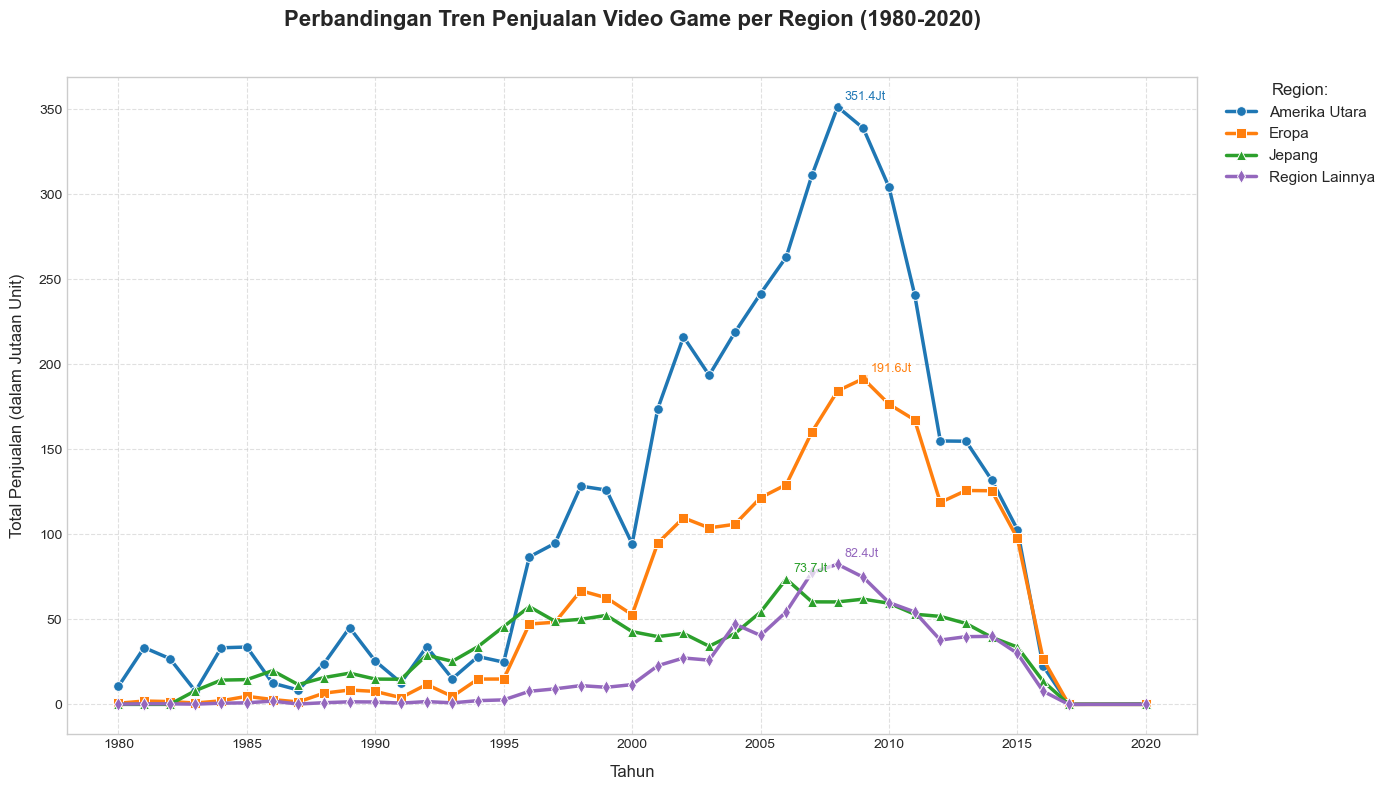

In [16]:
interactive_sales_by_region(df)

Kemudian Visualisasi Tren Genre Populer: Perkembangan genre populer dari waktu ke waktu. Visualisasi ini menampilkan tren perkembangan genre populer dari waktu ke waktu menggunakan heatmap. Setiap sel dalam heatmap mewakili tingkat popularitas suatu genre pada periode tertentu

In [17]:
def plot_heatmap_genre(df, selected_genres=None):
    if selected_genres is None or len(selected_genres) == 0:
        print("Pilih minimal satu genre untuk ditampilkan.")
        return

    df_filtered = df[df['Genre'].isin(selected_genres)]
    df_grouped_genre = df_filtered.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

    plt.figure(figsize=(16, 10))
    ax = sns.heatmap(df_grouped_genre,
                     annot=True,
                     cmap='YlGnBu',
                     fmt='d',
                     linewidths=0.5,
                     annot_kws={'size': 8},
                     cbar_kws={'label': 'Jumlah Video Game'})

    plt.title('Tren Genre Populer per Tahun', fontsize=16, pad=20)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Tahun', fontsize=12)

    plt.xticks(rotation=45, ha='right', fontsize=10)
    year_labels = [int(year) if i % 2 == 0 else '' for i, year in enumerate(df_grouped_genre.index)]
    plt.yticks(np.arange(len(df_grouped_genre.index)),
               labels=year_labels,
               rotation=0,
               fontsize=10)

    plt.tight_layout()

def interactive_heatmap_genre(df):
    all_genres = sorted(df['Genre'].unique())

    genre_checkboxes = {
        genre: widgets.Checkbox(value=True, description=genre)
        for genre in all_genres
    }

    def update_heatmap(change=None):
        clear_output(wait=True)

        selected_genres = [genre for genre, checkbox in genre_checkboxes.items() if checkbox.value]
        plot_heatmap_genre(df, selected_genres)

        display(widgets.VBox(list(genre_checkboxes.values())))

    for checkbox in genre_checkboxes.values():
        checkbox.observe(update_heatmap, names='value')

    display(widgets.VBox(list(genre_checkboxes.values())))
    update_heatmap()

    plt.show()


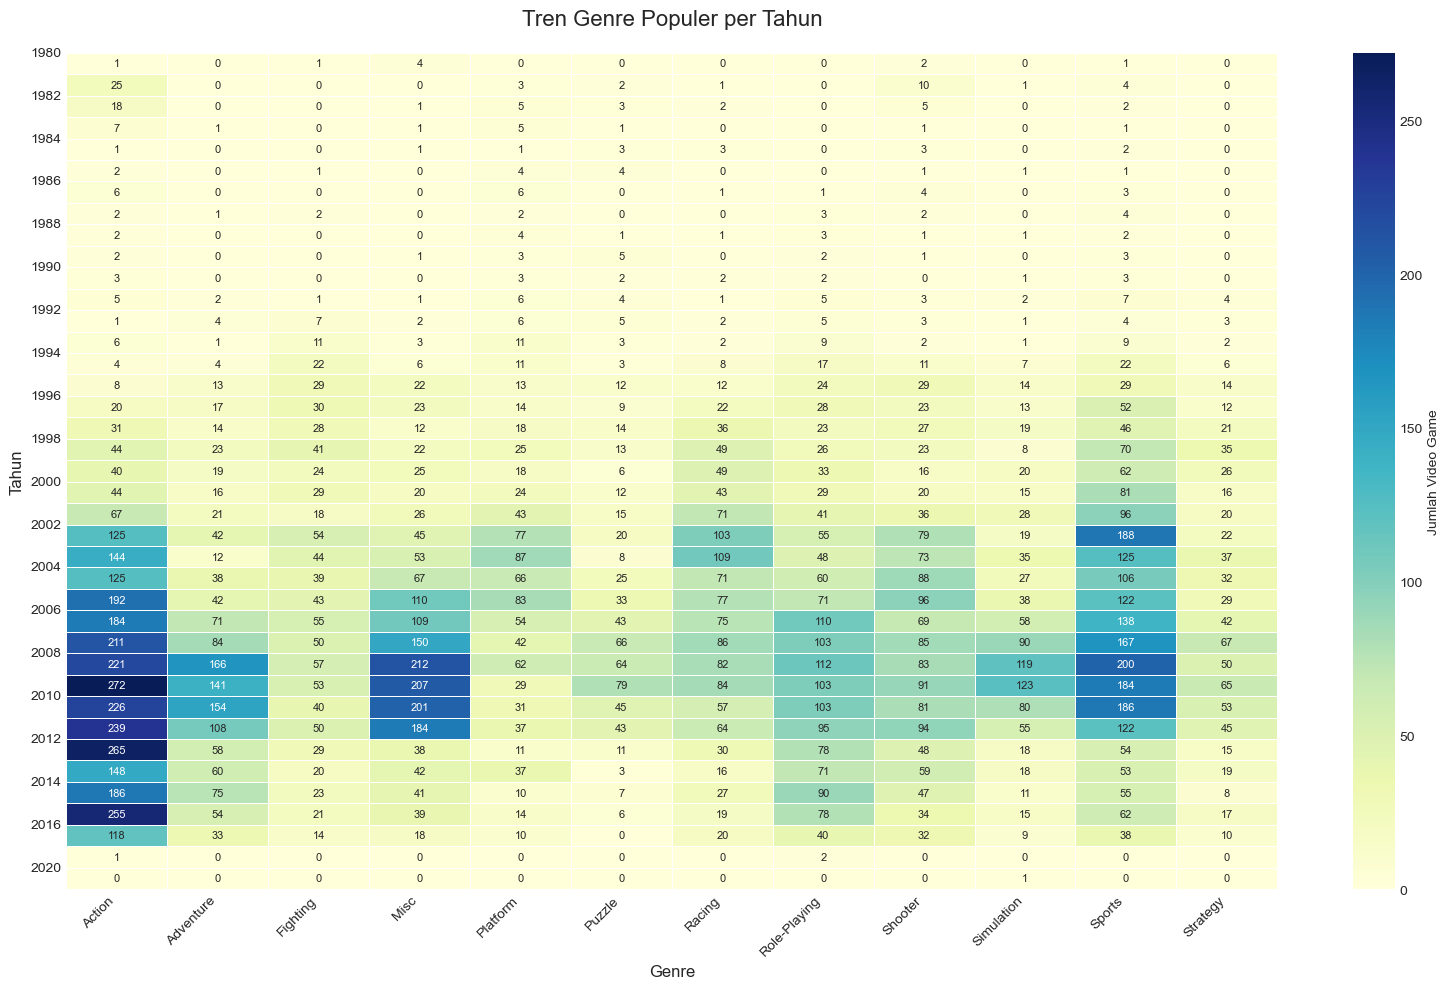

In [18]:
interactive_heatmap_genre(df)

## Visualisasi Perbandingan

Kita akan memvisualisasikan 10 publisher teratas dengan total penjualan global tertinggi. Grafik ini memberikan gambaran publisher mana yang paling mendominasi pasar dan berkontribusi besar terhadap industri game secara keseluruhan.

In [19]:
# Fungsi plotting
def plot_top_publishers(df_filtered, tahun_label):
    top_publishers = df_filtered.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

    plt.figure(figsize=(14,8))
    ax = sns.barplot(data=top_publishers, x='Global_Sales', y='Publisher', hue='Publisher', palette='viridis')

    plt.title(f'Top 10 Publisher dengan Penjualan Global Tertinggi ({tahun_label})', fontsize=14)
    plt.xlabel('Total Global Sales (juta unit)')
    plt.ylabel('Publisher')

    for p in ax.patches:
        ax.annotate(f"{p.get_width():.1f}", (p.get_width()+0.3, p.get_y() + 0.5), va='center')

    plt.tight_layout()
    plt.show()

# Fungsi GUI interaktif
def interactive_top_publishers(df):
    min_year = df['Year'].min()
    max_year = df['Year'].max()

    year_slider = widgets.IntSlider(
        value=max_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Pilih Tahun:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='70%')
    )

    all_years_checkbox = widgets.Checkbox(
        value=True,
        description=' Penjualan Tertinggi Semua Tahun',
        indent=False
    )

    def update_plot(year, all_years):
        clear_output(wait=True)

        if all_years:
            df_filtered = df.copy()
            tahun_label = "Semua Tahun"
        else:
            df_filtered = df[df['Year'] == year]
            tahun_label = f"Tahun {year}"

        plot_top_publishers(df_filtered, tahun_label)

    widgets.interact(update_plot, year=year_slider, all_years=all_years_checkbox)



In [20]:
# Jalankan fungsi interaktif
interactive_top_publishers(df)

interactive(children=(IntSlider(value=2020, description='Pilih Tahun:', layout=Layout(width='70%'), max=2020, …

Selanjutnya kita juga akan memvisualisasikan 20 game dengan penjualan tertinggi sepanjang masa. Melalui visualisasi ini, kita dapat mengidentifikasi judul-judul game yang paling populer dan berhasil secara komersial, serta memahami tren minat pasar dari waktu ke waktu.

In [21]:
# Fungsi plotting
def plot_top_games(df_filtered, tahun_label):
    top_games = df_filtered[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(20)

    plt.figure(figsize=(14,10))
    ax = sns.barplot(data=top_games, x='Global_Sales', y='Name', hue='Name', palette='mako')

    plt.title(f'Top 20 Game Terlaris Secara Global ({tahun_label})', fontsize=14)
    plt.xlabel('Total Global Sales (juta unit)')
    plt.ylabel('Nama Game')

    for p in ax.patches:
        ax.annotate(f"{p.get_width():.1f}", (p.get_width()+0.2, p.get_y() + 0.5), va='center')

    plt.tight_layout()
    plt.show()

# Fungsi GUI interaktif
def interactive_top_games(df):
    min_year = df['Year'].min()
    max_year = df['Year'].max()

    year_slider = widgets.IntSlider(
        value=max_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Pilih Tahun:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='70%')
    )

    all_years_checkbox = widgets.Checkbox(
        value=True,
        description='Tampilkan Semua Tahun',
        indent=False
    )

    def update_plot(year, all_years):
        clear_output(wait=True)

        if all_years:
            df_filtered = df.copy()
            tahun_label = "Semua Tahun"
        else:
            df_filtered = df[df['Year'] == year]
            tahun_label = f"Tahun {year}"

        plot_top_games(df_filtered, tahun_label)

    widgets.interact(update_plot, year=year_slider, all_years=all_years_checkbox)

In [22]:
interactive_top_games(df)

interactive(children=(IntSlider(value=2020, description='Pilih Tahun:', layout=Layout(width='70%'), max=2020, …

Kita juga memvisualisasikan platform/konsol mana yang memiliki performa penjualan terbaik secara global. Grafik ini memberikan informasi penting mengenai distribusi popularitas antara berbagai konsol.

In [23]:
# Fungsi plot
def plot_platform_sales(df_filtered, tahun_label):
    platform_sales = df_filtered.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

    plt.figure(figsize=(14,6))
    ax = sns.barplot(
        data=platform_sales,
        x='Platform',
        y='Global_Sales',
        hue='Platform',
        dodge=False,
        palette='crest'
    )


    plt.title(f'Total Penjualan Global per Platform ({tahun_label})', fontsize=14)
    plt.xlabel('Platform')
    plt.ylabel('Total Global Sales (juta unit)')
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2, p.get_height() + 0.2), ha='center')

    plt.tight_layout()
    plt.show()

# Fungsi interaktif
def interactive_platform_sales(df):
    min_year = int(df['Year'].min())
    max_year = int(df['Year'].max())

    year_slider = widgets.IntSlider(
        value=max_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Pilih Tahun:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='70%')
    )

    all_years_checkbox = widgets.Checkbox(
        value=True,
        description='Tampilkan Semua Tahun',
        indent=False
    )

    def update_plot(year, all_years):
        clear_output(wait=True)

        if all_years:
            df_filtered = df.copy()
            tahun_label = "Semua Tahun"
        else:
            df_filtered = df[df['Year'] == year]
            tahun_label = f"Tahun {year}"

        plot_platform_sales(df_filtered, tahun_label)

    widgets.interact(update_plot, year=year_slider, all_years=all_years_checkbox)


In [24]:
interactive_platform_sales(df)

interactive(children=(IntSlider(value=2020, description='Pilih Tahun:', layout=Layout(width='70%'), max=2020, …

## Visualisasi Korelasi

In [25]:
def plot_scatter(selected_genre='All', year_min=1980, year_max=2020):
    plt.figure(figsize=(12, 8))

    # Filter data
    filtered_df = df.copy()
    if selected_genre != 'All':
        filtered_df = filtered_df[filtered_df['Genre'] == selected_genre]
    filtered_df = filtered_df[(filtered_df['Year'] >= year_min) & (filtered_df['Year'] <= year_max)]

    # Scatter plot
    sns.scatterplot(
        x="Year",
        y="Global_Sales",
        data=filtered_df,
        hue="Genre",
        size="Global_Sales",
        sizes=(20, 200),
        alpha=0.7,
        palette="viridis",
        legend=False
    )

    # Garis regresi
    sns.regplot(
        x="Year",
        y="Global_Sales",
        data=filtered_df,
        scatter=False,
        color="red",
        line_kws={"linestyle": "--", "linewidth": 2}
    )

    # Anotasi 5 game teratas di filter
    top_games = filtered_df.nlargest(5, 'Global_Sales')
    for idx, row in top_games.iterrows():
        plt.annotate(
            row['Name'],
            xy=(row['Year'], row['Global_Sales']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7)
        )

    plt.title("Korelasi antara Tahun Rilis dan Penjualan Global", fontsize=16)
    plt.xlabel("Tahun Rilis", fontsize=12)
    plt.ylabel("Penjualan Global (Juta Unit)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Interaktif filter
widgets.interact(
    plot_scatter,
    selected_genre=widgets.Dropdown(options=['All'] + sorted(df['Genre'].dropna().unique()), value='All', description='Genre:'),
    year_min=widgets.IntSlider(min=int(df['Year'].min()), max=int(df['Year'].max()), step=1, value=int(df['Year'].min()), description='Dari Tahun'),
    year_max=widgets.IntSlider(min=int(df['Year'].min()), max=int(df['Year'].max()), step=1, value=int(df['Year'].max()), description='Sampai Tahun')
)

interactive(children=(Dropdown(description='Genre:', options=('All', 'Action', 'Adventure', 'Fighting', 'Misc'…

<function __main__.plot_scatter(selected_genre='All', year_min=1980, year_max=2020)>

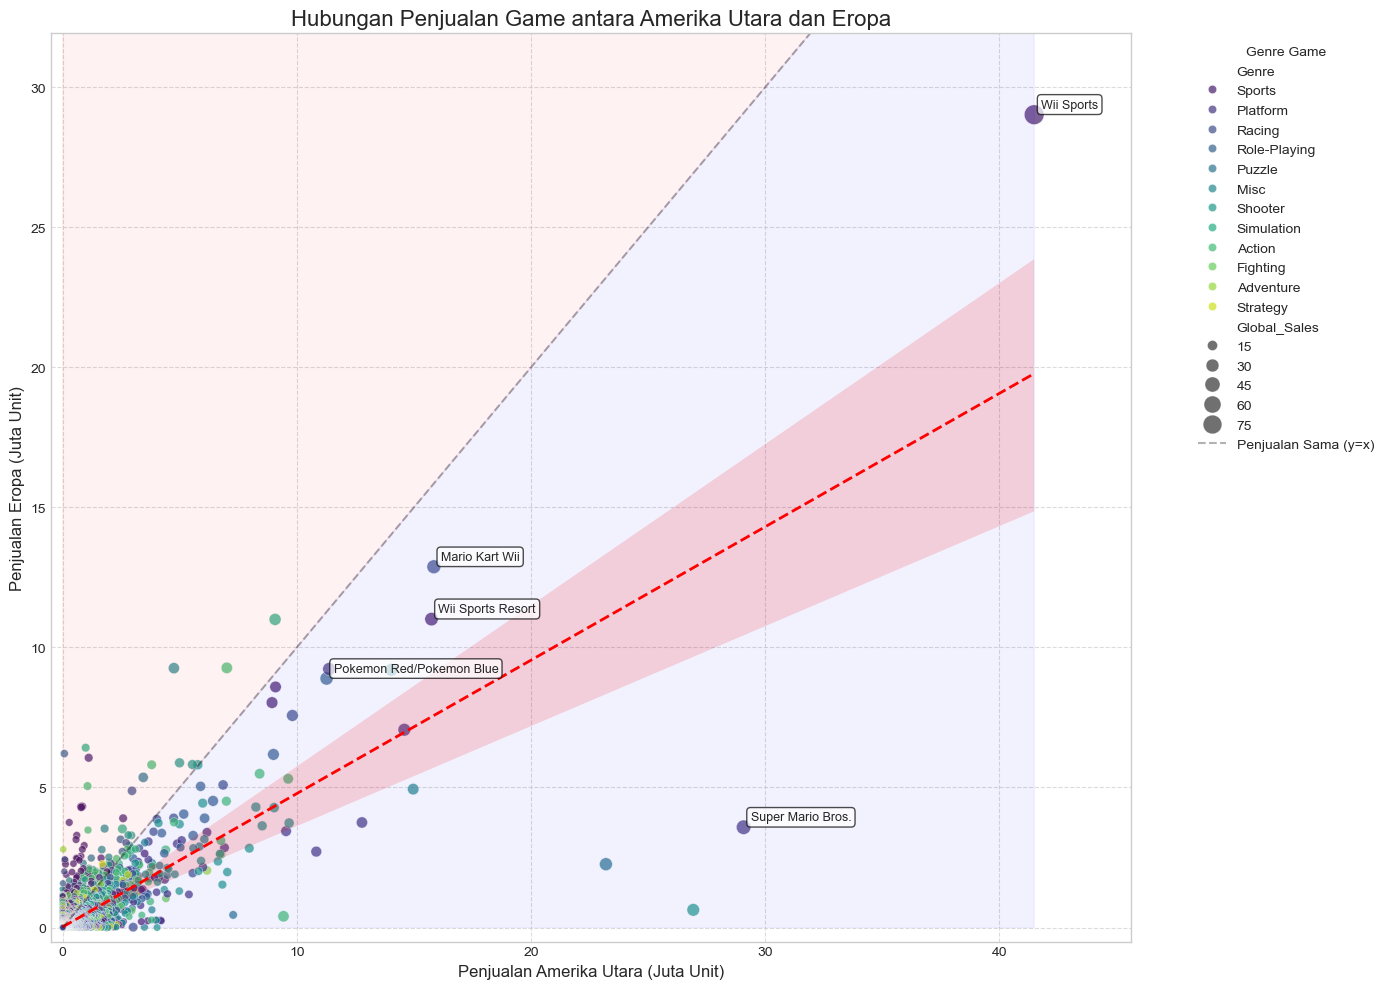

In [26]:
plt.figure(figsize=(14, 10))

scatter = sns.scatterplot(
    x="NA_Sales",
    y="EU_Sales",
    data=df,
    hue="Genre",
    size="Global_Sales",
    sizes=(20, 200),
    alpha=0.7,
    palette="viridis"
)

sns.regplot(
    x="NA_Sales",
    y="EU_Sales",
    data=df,
    scatter=False,
    color="red",
    line_kws={"linestyle": "--", "linewidth": 2}
)

max_sales = max(df["NA_Sales"].max(), df["EU_Sales"].max())
plt.plot([0, max_sales], [0, max_sales], 'k--', alpha=0.3, label="Penjualan Sama (y=x)")

plt.title("Hubungan Penjualan Game antara Amerika Utara dan Eropa", fontsize=16)
plt.xlabel("Penjualan Amerika Utara (Juta Unit)", fontsize=12)
plt.ylabel("Penjualan Eropa (Juta Unit)", fontsize=12)

top_games = df.nlargest(5, 'Global_Sales')
for idx, row in top_games.iterrows():
    plt.annotate(
        row['Name'],
        xy=(row['NA_Sales'], row['EU_Sales']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7)
    )

plt.legend(title="Genre Game", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.grid(True, linestyle='--', alpha=0.7)

plt.fill_between([0, max_sales], [0, 0], [0, max_sales], color='blue', alpha=0.05, label="NA < EU")
plt.fill_between([0, max_sales], [0, max_sales], [max_sales, max_sales], color='red', alpha=0.05, label="NA > EU")

plt.xlim(-0.5, max(df["NA_Sales"].max() * 1.1, 1))
plt.ylim(-0.5, max(df["EU_Sales"].max() * 1.1, 1))

plt.tight_layout()
plt.show()

## Visualisasi Geografis

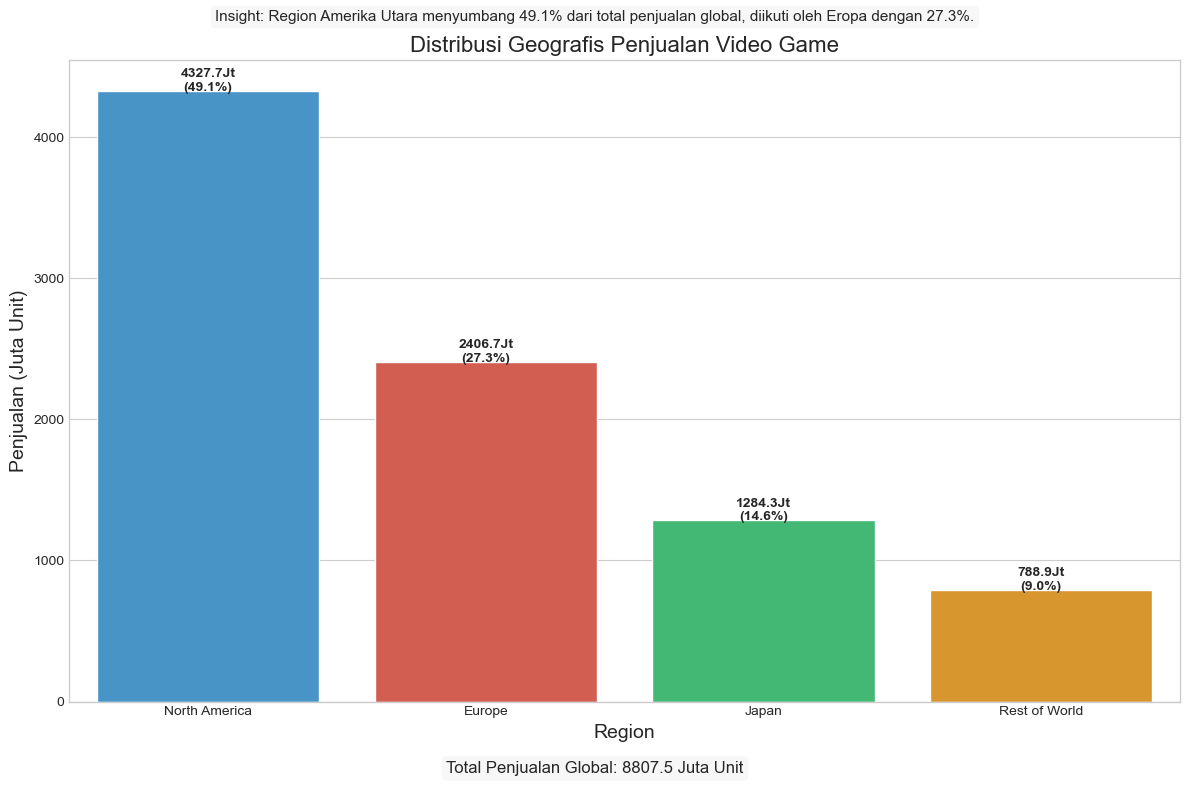

In [27]:
# Siapkan data penjualan per region
region_sales = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Japan', 'Rest of World'],
    'Sales': [df['NA_Sales'].sum(), df['EU_Sales'].sum(),
              df['JP_Sales'].sum(), df['Other_Sales'].sum()]
})

# Hitung persentase dari total
total_sales = region_sales['Sales'].sum()
region_sales['Percentage'] = (region_sales['Sales'] / total_sales * 100).round(1)

# Urutkan berdasarkan nilai penjualan (dari tertinggi ke terendah)
region_sales = region_sales.sort_values('Sales', ascending=False)

# Buat figure dengan ukuran yang sesuai
plt.figure(figsize=(12, 8))

sns.set_style("whitegrid")

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

ax = sns.barplot(
    x='Region',
    y='Sales',
    hue='Region',
    data=region_sales,
    palette=colors,
    legend=False
)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = region_sales['Percentage'].iloc[i]

    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,
        f'{height:.1f}Jt\n({percentage}%)',
        ha="center",
        fontweight='bold'
    )

plt.title('Distribusi Geografis Penjualan Video Game', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Penjualan (Juta Unit)', fontsize=14)

plt.figtext(
    0.5, 0.01,
    f'Total Penjualan Global: {total_sales:.1f} Juta Unit',
    ha='center',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='#f0f0f0', alpha=0.5)
)
i
insights = (
    f"Insight: Region Amerika Utara menyumbang {region_sales['Percentage'].iloc[0]:.1f}% "
    f"dari total penjualan global, diikuti oleh Eropa dengan {region_sales['Percentage'].iloc[1]:.1f}%."
)
plt.figtext(
    0.5, 0.95,
    insights,
    ha='center',
    fontsize=11,
    bbox=dict(boxstyle='round', facecolor='#f0f0f0', alpha=0.5)
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Kesimpulan
Berdasarkan visualisasi yang dilakukan, dapat disimpulkan bahwa industri video game mengalami lonjakan produksi signifikan pada pertengahan 2000-an, dengan penurunan setelahnya. Genre Action dan Sports mendominasi pasar, sementara platform seperti DS, PS2 dan PS3 menjadi yang paling populer. Penjualan global mencapai puncaknya antara 2008–2010, dengan Amerika Utara sebagai kontributor utama, diikuti oleh Eropa dan Jepang. Publisher besar seperti Nintendo dan Electronic Arts memimpin dari sisi penjualan, dan game legendaris seperti Wii Sports menjadi yang terlaris. Korelasi menunjukkan bahwa game dengan penjualan tinggi di satu region cenderung juga laku di region lain. Secara geografis, dominasi pasar tampak kuat di NA dan EU, mencerminkan basis konsumen terbesar berada di dua wilayah tersebut.